### Import the libraries

In [1019]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from math import ceil
from scipy import stats
from numpy import inf
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from math import ceil
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegression, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


### Import the excel files 

In [1020]:
data=pd.read_csv(r'C:\Users\Antonio\Desktop\BC2_predicting_cancellations\H2.csv')

### Understand the data

In [1021]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [1022]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [1023]:
# Define metric and non-metric features
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','DepositType','Company','Agent','CustomerType','ReservationStatus','ReservationStatusDate']
metric_features = data.columns.drop(non_metric_features).to_list()
# C

In [1024]:
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [1025]:
# Summary statistics for all variables
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,NaN,NaN,NaN,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,NaN,NaN,NaN,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,NaN,NaN,NaN,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330.0,NaN,NaN,NaN,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,NaN,NaN,NaN,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,NaN,NaN,NaN,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,NaN,NaN,NaN,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,NaN,NaN,NaN,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,NaN,NaN,NaN,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0


In [1026]:
# Check missing values
data.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [1027]:
# Check duplicated observations
data[data.duplicated()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
12,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
18,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
22,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,0,186,2017,August,35,31,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03
79292,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


# All Numeric Variables' Box Plots in one figure
sns.set()
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=data[feat], hue=data['IsCanceled'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

# Pairwise Relationship of Numerical Variables
sns.set()
features = metric_features + ['IsCanceled']

# Setting pairplot
sns.pairplot(data=data[features], hue='IsCanceled', diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

plt.show()

# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()

features = non_metric_features 
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=data[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

features = non_metric_features 
features.remove('IsCanceled')
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    datag = data.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=datag, x=feat, y='prop', hue='IsCanceled', ax=ax)

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

# Data Preparation

### Feature Engineering 

In [1028]:
data_FE=data.copy()

In [1029]:
#creation of a changeroomtype
data_FE['changeroomtype'] = data_FE['AssignedRoomType'] != data_FE['ReservedRoomType']
data_FE['changeroomtype'] = data_FE['changeroomtype'].replace({True:1, False:0})

In [1030]:
#creation of ADR
data_FE['ADRpp']=data_FE['ADR']/(data_FE['Adults']+data_FE['Children'])

In [1031]:
#creation total number of previorus bookings 
data_FE['PreviousBookings']=data_FE['PreviousBookingsNotCanceled']+data_FE['PreviousCancellations']

In [1032]:
#total number of days that were reserved
data_FE['totaldaysreserved']= data_FE['StaysInWeekendNights']+data_FE['StaysInWeekNights']

In [1033]:
#children+babies per adult
data_FE['kidsperadult']=(data_FE['Children']+data_FE['Babies'])/data_FE['Adults']
#The case when a reservation has only children it means the adults are in another bedroom. For the sake of simplicity we 
#replaced the value 'inf' for zero.this will help us run the models afterwards.
data_FE['kidsperadult'] = data_FE['kidsperadult'].replace({inf:0})

In [1034]:
#reservationstatusdate-separate by 3 columns- day,month,year
new = data_FE["ReservationStatusDate"].str.split("-", n = 2, expand = True) 
data_FE['ReservationStatusYEAR']= new[0]
data_FE['ReservationStatusMONTH']= new[1]
data_FE['ReservationStatusDAY']= new[2]
del data_FE['ReservationStatusDate']

#### Analysis of the metric variables

In [1035]:
#With feature engineering, the team came up with an additional 5 metric variables.Therefore, they also have to be analyzed.
metric_features = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','TotalOfSpecialRequests','ADRpp','PreviousBookings','totaldaysreserved','kidsperadult']

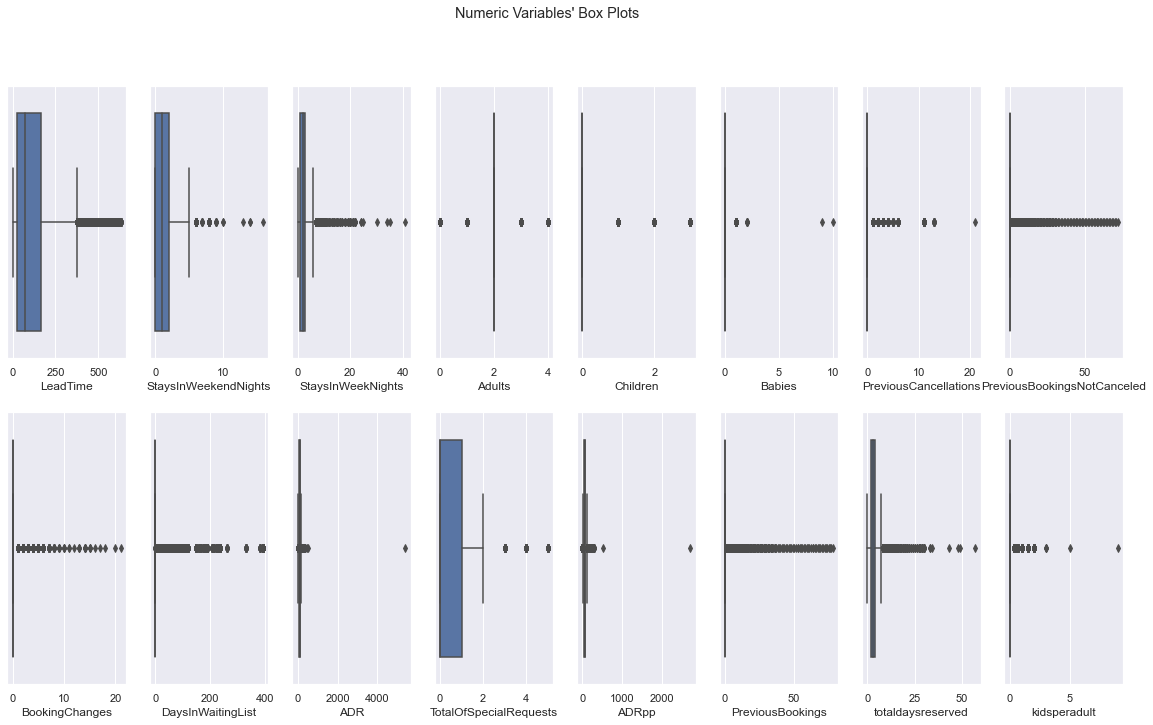

In [1036]:
#boxplot
# All Numeric Variables' Box Plots in one figure
sns.set()
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_FE[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### Select data

In [1037]:
#drop duplicates 
data_FE.drop_duplicates(inplace=True)
#drop DepositType
#data=data.drop(['DepositType'],axis=1)
del data_FE['DepositType']
#drop reservations with no adults nor children
data_FE.drop(data_FE[(data_FE['Adults']==0) & (data_FE['Children']==0)].index, inplace = True)

### Clean Data

In [1038]:
data_clean=data_FE.copy()

### NaN values 

In [1039]:
#erase from the dataset the observations that contain nan values 
data_clean=data_clean.dropna(axis=0)

#### 'Null' values 

In [1040]:
 data_clean[data_clean=='       NULL'].count()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           0
Babies                             0
Meal                               0
Country                            0
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
Agent                           5541
Company                        50502
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

In [1041]:
# Most of the values in 'Company' are 'NULL'.Therefore,to simplify our analysis we will change the value 'null' to 0 and the rest to 1.
data_clean.loc[data_clean['Company'] != '       NULL', 'Company'] = 1
data_clean.loc[data_clean['Company'] == '       NULL', 'Company'] = 0

#### Encode categorical variables 

In [1042]:
#Updating the non_metric_features by adding the new features 
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','Company','Agent','CustomerType','ReservationStatus','changeroomtype','ReservationStatusYEAR','ReservationStatusMONTH','ReservationStatusDAY']
data_clean[non_metric_features]

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,ReservedRoomType,AssignedRoomType,Company,Agent,CustomerType,ReservationStatus,changeroomtype,ReservationStatusYEAR,ReservationStatusMONTH,ReservationStatusDAY
0,0,2015,July,27,1,HB,PRT,Offline TA/TO,TA/TO,0,A,A,0,6,Transient,Check-Out,0,2015,07,03
1,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,07,01
2,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,04,30
3,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,06,23
4,1,2015,July,27,2,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,04,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,2017,August,35,30,BB,BEL,Offline TA/TO,TA/TO,0,A,A,0,394,Transient,Check-Out,0,2017,09,06
79326,0,2017,August,35,31,BB,FRA,Online TA,TA/TO,0,E,E,0,9,Transient,Check-Out,0,2017,09,07
79327,0,2017,August,35,31,BB,DEU,Online TA,TA/TO,0,D,D,0,9,Transient,Check-Out,0,2017,09,07
79328,0,2017,August,35,31,BB,GBR,Online TA,TA/TO,0,A,A,0,89,Transient,Check-Out,0,2017,09,07


The variables that need One Hot encoding are:'Meal','Country','MarketSegment','DistributionChannel',
'ReservedRoomType','Agent','CustomerType','ReservationStatus','AssignedRoomType'.
Ordinal variables that need label enconding:ArrivalDateMonth


In [1043]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_clean[['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','Agent','CustomerType','ReservationStatus']])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=data_clean.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df.head(3)

,x0_FB,x0_HB,x0_SC,x1_AGO,x1_AIA,x1_ALB,x1_AND,x1_ARE,x1_ARG,x1_ARM,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1044]:
#Changing the months to numbers, from 1-12
data_clean.loc[data_clean['ArrivalDateMonth'] == 'January','ArrivalDateMonth'] = 1
data_clean.loc[data_clean['ArrivalDateMonth'] == 'February','ArrivalDateMonth'] = 2
data_clean.loc[data_clean['ArrivalDateMonth'] == 'March','ArrivalDateMonth'] = 3
data_clean.loc[data_clean['ArrivalDateMonth'] == 'April','ArrivalDateMonth'] = 4
data_clean.loc[data_clean['ArrivalDateMonth'] == 'May','ArrivalDateMonth'] = 5
data_clean.loc[data_clean['ArrivalDateMonth'] == 'June','ArrivalDateMonth'] = 6
data_clean.loc[data_clean['ArrivalDateMonth'] =='July','ArrivalDateMonth'] = 7
data_clean.loc[data_clean['ArrivalDateMonth'] == 'August','ArrivalDateMonth'] = 8
data_clean.loc[data_clean['ArrivalDateMonth'] == 'September','ArrivalDateMonth'] = 9
data_clean.loc[data_clean['ArrivalDateMonth'] =='October','ArrivalDateMonth'] = 10
data_clean.loc[data_clean['ArrivalDateMonth'] == 'November','ArrivalDateMonth'] = 11
data_clean.loc[data_clean['ArrivalDateMonth'] == 'December','ArrivalDateMonth'] = 12

In [1045]:
# Reassigning data to contain ohc variables
data_clean = pd.concat([data_clean.drop(columns=['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','Agent','CustomerType','ReservationStatus','AssignedRoomType']), ohc_df], axis=1)
data_clean.head(3)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0,6,2015,7,27,1,0,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,88,2015,7,27,1,0,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,65,2015,7,27,1,0,4,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1046]:
data_clean['ArrivalDateMonth'] = data_clean['ArrivalDateMonth'].astype(float)
data_clean['Company'] = data_clean['Company'].astype(float)
data_clean['ReservationStatusYEAR'] = data_clean['ReservationStatusYEAR'].astype(float)
data_clean['ReservationStatusMONTH'] = data_clean['ReservationStatusMONTH'].astype(float)
data_clean['ReservationStatusDAY'] = data_clean['ReservationStatusDAY'].astype(float)

#### Outliers

In [1047]:
data_out=data_clean.copy()

#### Manually-Univariate outliers

In [1048]:
data_out['StaysInWeekendNights'].sort_values(ascending =False)

14644    14
22522    10
22523    10
7403      9
63222     9
         ..
28380     0
28381     0
28382     0
28383     0
0         0
Name: StaysInWeekendNights, Length: 53267, dtype: int64

In [1049]:
data_out['StaysInWeekNights'].sort_values(ascending = False)

14644    34
63222    25
40911    24
42038    22
6634     22
         ..
26212     0
59293     0
6916      0
6917      0
6518      0
Name: StaysInWeekNights, Length: 53267, dtype: int64

In [1050]:
data_out['PreviousCancellations'].sort_values(ascending= False)

33654    21
37279    13
37280    13
37281    13
37290    13
         ..
32003     0
32004     0
32005     0
32006     0
79329     0
Name: PreviousCancellations, Length: 53267, dtype: int64

In [1051]:
data_out['DaysInWaitingList'].sort_values(ascending = False)

19390    391
18092    391
19335    391
19025    391
19016    391
        ... 
32791      0
32792      0
32796      0
32797      0
79329      0
Name: DaysInWaitingList, Length: 53267, dtype: int64

In [1052]:
data_out['ADR'].sort_values(ascending = False)

8455     5400.00
71343     510.00
63852     451.50
63729     375.50
78455     372.33
          ...   
43420       0.00
75988       0.00
75987       0.00
43468       0.00
0           0.00
Name: ADR, Length: 53267, dtype: float64

In [1053]:
data_out['totaldaysreserved'].sort_values(ascending = False)

14644    48
63222    34
40911    33
22522    30
6634     30
         ..
59544     0
37087     0
60906     0
59548     0
39837     0
Name: totaldaysreserved, Length: 53267, dtype: int64

In [1054]:
data_out['kidsperadult'].sort_values(ascending = False)

38596    9.0
6559     5.0
75801    3.0
11135    3.0
40926    3.0
        ... 
34334    0.0
34354    0.0
34374    0.0
34394    0.0
79329    0.0
Name: kidsperadult, Length: 53267, dtype: float64

In [1055]:
filter1 = (
    (data_out['StaysInWeekendNights']<=10)
&
    (data_out['StaysInWeekNights']<=20)
&
    (data_out['PreviousCancellations']<=10)
&       
    (data_out['DaysInWaitingList']<=300)
&
    (data_out['ADR']<=400)
&
(data_out['totaldaysreserved']<=40)
&
(data_out['kidsperadult']<=8))
data_out1 = data_out[filter1]

In [1056]:
print('Percentage of data kept after removing outliers:', np.round(data_out1.shape[0] / data_out.shape[0], 4))

Percentage of data kept after removing outliers: 0.9988


#### LOF

In [1057]:
data_lof=data_out.copy()
clf = LocalOutlierFactor(contamination = 0.05)
lof = clf.fit_predict(data_out)
len(lof[lof==-1])
data_lof['LOF Outliers'] = lof

print('Percentage of data kept after removing outliers:', np.round(len(data_lof[data_lof['LOF Outliers']==1]) / data_out.shape[0],4))

Percentage of data kept after removing outliers: 0.95


In [1058]:
#data without the outliers
data_LOF=data_lof[data_lof['LOF Outliers']==1]
del data_LOF['LOF Outliers']
#the outliers detected
outliers_LOF=data_lof[data_lof['LOF Outliers']==-1]

#### Isolation Forest

In [1059]:
data_if=data_out.copy()
clf = IsolationForest(contamination=0.05,max_samples=100)
_if = clf.fit_predict(data_out)
data_if['IF Outliers'] = _if

print('Percentage of data kept after removing outliers:', np.round(len(data_if[data_if['IF Outliers']==1]) / data_out.shape[0],4))

Percentage of data kept after removing outliers: 0.95


In [1060]:
#data without the outliers
data_IF=data_if[data_if['IF Outliers']==1]
del data_IF['IF Outliers']
#the outliers detected
outliers_IF=data_lof[data_if['IF Outliers']==-1]

Datasets
None:data_out
Manual:data_out1
LOF:data_LOF
IF:data_IF

In [1099]:
data_FS=data_IF.copy()

In [1093]:
data_FS

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x6_ 476,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_No-Show
0,0,6,2015,7.0,27,1,0,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,88,2015,7.0,27,1,0,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,65,2015,7.0,27,1,0,4,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,92,2015,7.0,27,1,2,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,100,2015,7.0,27,2,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,8.0,35,30,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79326,0,102,2017,8.0,35,31,2,5,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79327,0,34,2017,8.0,35,31,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79328,0,109,2017,8.0,35,31,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature Selection

In [1100]:
#Correlation w/ IsCanceled
data_FS.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30)

IsCanceled                  1.000000
x8_Check-Out                1.000000
x6_          9              0.230023
changeroomtype              0.189692
LeadTime                    0.188944
x8_No-Show                  0.173782
x2_Online TA                0.172212
TotalOfSpecialRequests      0.163112
x3_TA/TO                    0.134214
x7_Transient                0.122003
x7_Transient-Party          0.117635
RequiredCarParkingSpaces    0.114892
x2_Offline TA/TO            0.114787
x3_Direct                   0.109272
totaldaysreserved           0.107758
StaysInWeekNights           0.106023
x2_Direct                   0.104634
x1_PRT                      0.103372
ReservationStatusMONTH      0.102253
x6_          7              0.097450
x6_       NULL              0.097220
x6_         28              0.092800
BookingChanges              0.088829
ArrivalDateYear             0.087161
x1_FRA                      0.083994
Adults                      0.076095
x6_         14              0.075791
C

In [ ]:
#It seems that regardless of the outlier method used, the variable 'x8_Check-Out' is perfectly correlated with the 
#target which seems strange and it hinders our analysis.Therefore we will take it out 
del data_FS['x8_Check-Out']

In [1063]:
top30 = list()
top30.append(data_FS.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30))

In [1064]:
top30

[x8_Check-Out                1.000000
 IsCanceled                  1.000000
 x6_          9              0.236309
 changeroomtype              0.192613
 LeadTime                    0.190788
 x8_No-Show                  0.181768
 x2_Online TA                0.181152
 TotalOfSpecialRequests      0.164989
 x3_TA/TO                    0.145237
 RequiredCarParkingSpaces    0.125468
 x7_Transient                0.117669
 totaldaysreserved           0.117450
 StaysInWeekNights           0.114253
 x6_       NULL              0.113355
 x7_Transient-Party          0.113183
 x2_Offline TA/TO            0.110153
 x3_Direct                   0.109759
 x2_Direct                   0.101262
 ReservationStatusMONTH      0.097109
 x6_          7              0.094361
 BookingChanges              0.092112
 Company                     0.091345
 x6_         28              0.089843
 x1_PRT                      0.087750
 ADR                         0.084068
 ArrivalDateYear             0.083283
 x2_Corporat

In [1094]:
#RFE
target = data_FS['IsCanceled']
datafe = data_FS.copy().drop(['IsCanceled'], axis=1)

#modelLR = LinearRegression()
#rfe = RFE(estimator = modelLR, n_features_to_select = 30)
#c = rfe.fit_transform(X = datafe, y = target)
#modelLR.fit(X = datafe, y = target)
#selected_features = pd.Series(rfe.support_, index = datafe.columns)
#selected_features[selected_features.values==True]

In [1066]:
top30.append(selected_features[selected_features.values==True].index)

In [1067]:
#Lasso Regression
reg = LassoCV()
reg.fit(X = datafe, y = target)

LassoCV()

In [1068]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(datafe,target))

coef = pd.Series(reg.coef_, index = datafe.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")  

Best alpha using built-in LassoCV: 0.007185
Best score using built-in LassoCV: 0.998784
Lasso picked 4 variables and eliminated the other 441 variables


In [1069]:
top30.append(coef[coef.values!=0].index)

In [1070]:
#Ridge Regression
ridge = RidgeCV()
ridge.fit(X = datafe, y = target)
print('The alpha atribute using RidgeCV: %f' %ridge.alpha_)
print('The score using RidgeCV: %f' %ridge.score(datafe,target))
coef_ridge = pd.Series(ridge.coef_, index = datafe.columns)
coef_ridge.sort_values(ascending=False).head(30)

The alpha atribute using RidgeCV: 0.100000
The score using RidgeCV: 1.000000


ArrivalDateYear    0.000034
x6_         78     0.000013
x6_        270     0.000013
x8_No-Show         0.000013
x6_         60     0.000012
x6_         47     0.000012
x6_         64     0.000012
x6_        287     0.000011
x1_ZMB             0.000011
x1_AND             0.000011
x1_HND             0.000010
x6_        235     0.000010
x1_GIB             0.000010
x6_        341     0.000010
x1_UMI             0.000010
x1_NIC             0.000009
x1_BEN             0.000009
x6_        326     0.000009
x1_ZWE             0.000008
x6_        107     0.000008
x1_GLP             0.000008
x1_KHM             0.000008
x6_         41     0.000008
x6_         93     0.000007
x1_IMN             0.000007
x6_          4     0.000007
x6_        236     0.000007
x1_HKG             0.000007
x6_        179     0.000007
x1_GGY             0.000007
dtype: float64

In [1071]:
top30.append(coef_ridge.sort_values(ascending=False).head(20).index)

In [1095]:
# Decision Tree Classifier
gini_importance = DecisionTreeClassifier().fit(datafe, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(datafe, target).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

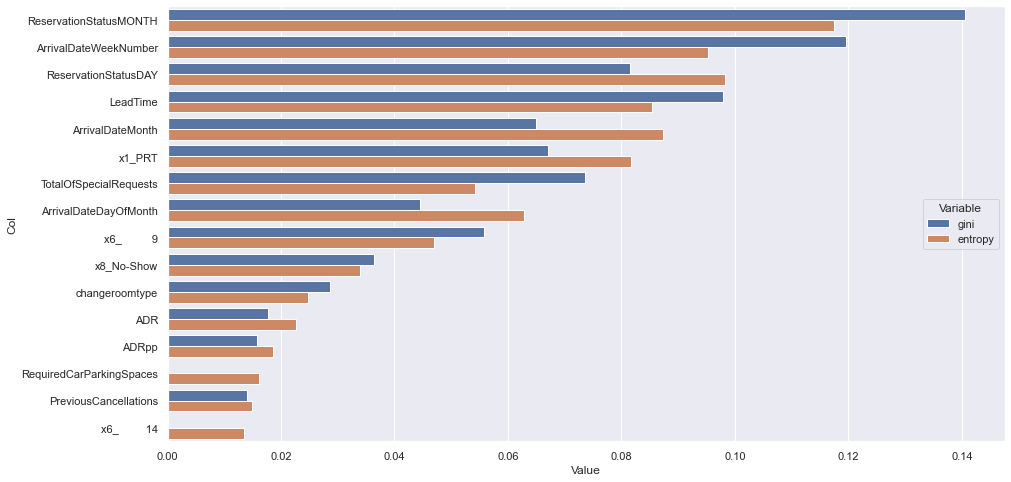

In [1096]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = datafe.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy.head(30))

In [1074]:
top30.append(tidy.sort_values(['Value'], ascending = False).head(30)['Col'].drop_duplicates().values)

In [1075]:
onlyDT = tidy.sort_values(['Value'], ascending = False).head(30)['Col'].drop_duplicates().values.tolist()

In [1076]:
series30 = pd.Series(top30) 
series30 = series30.explode().value_counts()
series30.head(30)

x8_Check-Out                   3
x6_         60                 2
x6_        235                 2
x6_         78                 2
ADRpp                          2
StaysInWeekendNights           2
totaldaysreserved              2
changeroomtype                 2
ArrivalDateYear                2
ADR                            2
IsRepeatedGuest                2
PreviousCancellations          2
StaysInWeekNights              2
x0_FB                          2
x6_        270                 2
PreviousBookings               2
x6_        107                 2
PreviousBookingsNotCanceled    2
x1_HND                         1
ReservationStatusYEAR          1
x1_KAZ                         1
0.1811523190301857             1
x1_POL                         1
ReservationStatusDAY           1
0.11766946090546195            1
x6_        213                 1
0.10975854089848194            1
1.0000000000000013             1
0.11015266368526092            1
0.14523685531536654            1
dtype: int

### Scaling

In [1077]:
independent_variables=data_out.drop(['IsCanceled'],axis=1)

In [1078]:
#min-max scaler
names = independent_variables.columns
# Create the Scaler object
scaler = MinMaxScaler()
# Fit your data on the scaler object
normalized_data = scaler.fit_transform(independent_variables)
normalized_data=pd.DataFrame(normalized_data,columns=names)

In [1079]:
#Standardization
names = independent_variables.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(independent_variables)
scaled_df = pd.DataFrame(scaled_df, columns=names) 

In [1080]:
#Robust Standardization
names = independent_variables.columns
# Create the Scaler object
scaler = RobustScaler()
# Fit your data on the scaler object
robuststd_data = scaler.fit_transform(independent_variables)
robuststd_data = pd.DataFrame(robuststd_data, columns=names) 

# Organization of the datasets
Storage of datasets with different outlier methods and normalization methods

In [ ]:
#DATAFRAME NONE
#normalized_data_NONE=normalized_data
#scaled_df_NONE=scaled_df
#robuststd_data_NONE=robuststd_data

In [ ]:
#DATAFRAME MANUAL
#normalized_data_MANUAL=normalized_data
#scaled_df_MANUAL=scaled_df
#robuststd_data_MANUAL=robuststd_data

In [ ]:
#DATAFRAME LOF
#normalized_data_LOF=normalized_data
#scaled_df_LOF=scaled_df
#robuststd_data_LOF=robuststd_data

In [ ]:
#DATAFRAME IF
#normalized_data_IF=normalized_data
#scaled_df_IF=scaled_df
#robuststd_data_IF=robuststd_data

# Model

# Hyperparameter tunning

In [1081]:
#param_grid = [
#  {'learning_rate':[0.1,0.3,0.5,0.8,1.0],
#    'n_estimators':[100,300,500],
#    'max_depth': [5,6,7,8],
#    'subsample':[0.1,0.3,0.5],
#    'min_samples_leaf':[5,7,10,12,15],
#    'min_samples_split':[200,250,300]
#  }]
#from sklearn.model_selection import GridSearchCV  
#grid_search = GridSearchCV(
#    estimator=clf, 
#    param_grid=param_grid, 
#    cv=5,
#    scoring='accuracy',
#    n_jobs=-1)
#
#grid_result= grid_search.fit(X_train, y_train)
#print('Best Params: ', grid_result.best_params_)
#print('Best Score: ', grid_result.best_score_)

# Classification report 

In [1082]:
# Test set classification report
print(classification_report(y_test, y_test_pred))

NameError: name 'classification_report' is not defined

In [ ]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred), 
             index=pd.Index(y_train.unique(), name="True"), 
             columns=pd.Index(y_train.unique(), name="Pred"))

# Lift curve

In [ ]:
# Plot lift curves
predicted_probas = best_dt.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

### Oversampling

In [ ]:
data['IsCanceled'].value_counts()